# 머신러닝 모델

#### AutoML 분석방법

본 프로젝트에서는 5가지 머신러닝 모델을 사용하여 전처리된 데이터셋, SMOTE를 적용한 데이터셋, Random Over Sampling(ROS)을 적용한 데이터셋을 바탕으로 최적의 모델을 선정했음.
AutoML로 모델별 best version을 찾은 다음 미리 분리해둔 test data 로 셩능을 측정하였음.

#### 적용된 모델:
- RandomForest
- AdaBoost
- LightGBM
- Linear Regression
- MLP (Multi-Layer Perceptron)

#### 데이터셋:
1. 전처리된 데이터셋
2. SMOTE 적용 데이터셋
3. ROS (Random Over Sampling) 적용 데이터셋

#### 분석 지표:
- Precision
- Recall
- F1 Score
- Kappa
- accuracy

## 데이터 불러오기

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('preprocessing.csv')

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [6]:
for col in df.columns[1:]:
    df[col] = sc.fit_transform(df[[col]])


In [7]:
import pandas as pd

# 모든 열을 출력할 수 있도록 설정
pd.set_option('display.max_columns', None)

In [8]:
metrics = {}
metrics_smote = {}
metrics_ros = {}

# 데이터 전처리 후

### pycaret setup

In [9]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


step = setup(df, target='Churn')

,Description,Value
0,Session id,874
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(51047, 54)"
4,Transformed data shape,"(51047, 54)"
5,Transformed train set shape,"(35732, 54)"
6,Transformed test set shape,"(15315, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


### RandomForest

In [10]:
from pycaret.classification import models

# 사용할 수 있는 분류 모델 목록 출력
available_models = models()
print(available_models)


                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Refe

In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7118,0.6420,0.0796,0.5000,0.1374,0.0632,0.1026
1,0.7154,0.6463,0.0854,0.5399,0.1475,0.0747,0.1215
2,0.7095,0.6424,0.0768,0.4731,0.1321,0.0562,0.0905
3,0.7187,0.6538,0.0845,0.5800,0.1476,0.0802,0.1350
4,0.7215,0.6502,0.1069,0.5914,0.1811,0.1019,0.1570
5,0.7162,0.6458,0.0767,0.5563,0.1348,0.0698,0.1204
6,0.7140,0.6465,0.0786,0.5260,0.1368,0.0668,0.1114
7,0.7201,0.6639,0.0806,0.6103,0.1424,0.0805,0.1414
8,0.7176,0.6385,0.0854,0.5677,0.1485,0.0791,0.1314


In [9]:
results = pull()

accuracy = results['Accuracy']['Mean']
auc = results['AUC']['Mean']
precision = results['Prec.']['Mean']
recall = results['Recall']['Mean']
f1 = results['F1']['Mean']
Kappa = results['Kappa']['Mean'] 

print(f"RandomForest - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

RandomForest - Accuracy: 0.7154, AUC: 0.6475,Precision: 0.5412, F1 Score: 0.1438


In [10]:
metrics['rf'] = [accuracy,auc, precision, recall, f1, Kappa]

### adaBoost

In [11]:
from pycaret.classification import models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7140,0.6412,0.0796,0.5256,0.1383,0.0676,0.1120
1,0.7174,0.6495,0.0932,0.5581,0.1597,0.0842,0.1340
2,0.7098,0.6474,0.0719,0.4744,0.1249,0.0531,0.0879
3,0.7198,0.6613,0.0904,0.5886,0.1567,0.0867,0.1428
4,0.7148,0.6556,0.0816,0.5316,0.1415,0.0703,0.1157
5,0.7165,0.6545,0.0932,0.5486,0.1593,0.0825,0.1304
6,0.7168,0.6464,0.0883,0.5549,0.1524,0.0795,0.1291
7,0.7204,0.6740,0.0874,0.6040,0.1527,0.0861,0.1454
8,0.7221,0.6465,0.1019,0.6069,0.1746,0.0999,0.1587


In [13]:
results = pull()

accuracy = results['Accuracy']['Mean']
auc = results['AUC']['Mean']
precision = results['Prec.']['Mean']
recall = results['Recall']['Mean']
f1 = results['F1']['Mean']
Kappa = results['Kappa']['Mean']

print(f"AdaBoost - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

AdaBoost - Accuracy: 0.7161, AUC: 0.6524,Precision: 0.5471, F1 Score: 0.1487


In [14]:
metrics['ada'] = [accuracy,auc, precision, recall, f1, Kappa]

### lightgbm

In [15]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7180,0.6535,0.1049,0.5567,0.1765,0.0937,0.1420
1,0.7180,0.6645,0.1010,0.5591,0.1711,0.0909,0.1402
2,0.7128,0.6559,0.0816,0.5091,0.1407,0.0664,0.1074
3,0.7238,0.6818,0.1059,0.6193,0.1809,0.1057,0.1665
4,0.7134,0.6692,0.0962,0.5130,0.1620,0.0782,0.1187
5,0.7215,0.6625,0.0990,0.6036,0.1701,0.0967,0.1551
6,0.7190,0.6608,0.1068,0.5670,0.1797,0.0972,0.1474
7,0.7235,0.6815,0.1010,0.6265,0.1739,0.1021,0.1648
8,0.7187,0.6477,0.1000,0.5691,0.1701,0.0918,0.1432


In [16]:
results = pull()

accuracy = results['Accuracy']['Mean']
auc = results['AUC']['Mean']
precision = results['Prec.']['Mean']
recall = results['Recall']['Mean']
f1 = results['F1']['Mean']
Kappa = results['Kappa']['Mean']

print(f"lightgbm - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

lightgbm - Accuracy: 0.7178, AUC: 0.6633,Precision: 0.5606, F1 Score: 0.1681


In [17]:
metrics['lgb'] = [accuracy,auc, precision, recall, f1, Kappa]

### LinearRegression

In [18]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7115,0.6032,0.0291,0.4918,0.0550,0.0235,0.0592
1,0.7104,0.6118,0.0243,0.4545,0.0461,0.0174,0.0459
2,0.7081,0.5959,0.0185,0.3654,0.0352,0.0077,0.0208
3,0.7123,0.6316,0.0243,0.5102,0.0464,0.0207,0.0579
4,0.7154,0.6183,0.0311,0.6154,0.0592,0.0324,0.0879
5,0.7103,0.6210,0.0252,0.4561,0.0478,0.0182,0.0472
6,0.7106,0.5994,0.0291,0.4688,0.0548,0.0219,0.0538
7,0.7128,0.6323,0.0301,0.5345,0.0570,0.0271,0.0698
8,0.7095,0.5973,0.0282,0.4394,0.0529,0.0189,0.0458


In [19]:
results = pull()

accuracy = results['Accuracy']['Mean']
auc = results['AUC']['Mean']
precision = results['Prec.']['Mean']
recall = results['Recall']['Mean']
f1 = results['F1']['Mean']
Kappa = results['Kappa']['Mean']

print(f"LinearRegression - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

LinearRegression - Accuracy: 0.7112, AUC: 0.6108,Precision: 0.4798, F1 Score: 0.0499


In [20]:
metrics['lr'] = [accuracy,auc, precision, recall, f1, Kappa]

### MLP

In [21]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6637,0.5703,0.2282,0.3660,0.2811,0.0768,0.0804
1,0.6788,0.5749,0.1806,0.3796,0.2447,0.0724,0.0804
2,0.6516,0.5835,0.2682,0.3594,0.3072,0.0809,0.0825
3,0.6891,0.5895,0.1837,0.4109,0.2539,0.0924,0.1043
4,0.6899,0.5965,0.2216,0.4262,0.2916,0.1177,0.1280
5,0.6641,0.5765,0.2233,0.3651,0.2771,0.0746,0.0785
6,0.6756,0.5787,0.1864,0.3743,0.2489,0.0707,0.0777
7,0.6837,0.6100,0.2126,0.4071,0.2793,0.1016,0.1104
8,0.6790,0.5909,0.2087,0.3931,0.2727,0.0909,0.0984


In [22]:
results = pull()

accuracy = results['Accuracy']['Mean']
auc = results['AUC']['Mean']
precision = results['Prec.']['Mean']
recall = results['Recall']['Mean']
f1 = results['F1']['Mean']
Kappa = results['Kappa']['Mean']

print(f"MLP - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

MLP - Accuracy: 0.6757, AUC: 0.5819,Precision: 0.3849, F1 Score: 0.2664


In [23]:
metrics['mlp'] = [accuracy,auc, precision, recall, f1, Kappa]

In [24]:
metrics

{'rf': [0.7154, 0.6475, 0.5412, 0.083, 0.1438, 0.0727],
 'ada': [0.7161, 0.6524, 0.5471, 0.086, 0.1487, 0.0764],
 'lgb': [0.7178, 0.6633, 0.5606, 0.099, 0.1681, 0.0892],
 'lr': [0.7112, 0.6108, 0.4798, 0.0263, 0.0499, 0.0205],
 'mlp': [0.6757, 0.5819, 0.3849, 0.2058, 0.2664, 0.0832]}

# SMOTE

### setup

In [25]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,PercChangeMinutes,PercChangeRevenues,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,total_call,TotalChargePerCall,ServiceArea_Central,ServiceArea_East,ServiceArea_Q,ServiceArea_West,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,1,0.024410,0.029759,0.080292,0.000000,0.0,0.0,0.027742,0.016274,1.000000,0.005128,0.018868,0.043478,0.071429,0.201431,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.444444,0.0,0.00,1.0,0.000000,0.028560,0.064756,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.017901,0.001359,0.068127,0.000000,0.0,0.0,0.002392,0.000678,0.945455,0.000000,0.018868,0.043478,0.000000,0.830490,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.555556,0.0,0.00,0.0,0.500000,0.000877,0.086436,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.035801,0.001087,0.119221,0.000000,0.0,0.0,0.000622,0.002509,0.981818,0.000000,0.018868,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.666667,0.0,0.00,0.0,0.333333,0.000186,0.192792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.071603,0.178285,0.209246,0.000000,1.0,1.0,0.265796,0.205940,0.963636,0.005128,0.037736,0.347826,0.214286,0.254816,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.666667,0.0,0.00,0.0,0.500000,0.250345,0.064043,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.018714,0.000000,0.068127,0.000000,0.0,0.0,0.000000,0.000000,0.854545,0.005128,0.037736,0.130435,0.142857,0.471657,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.000000,0.0,0.04,0.0,0.000000,0.000000,0.161850,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,0.043938,0.000000,0.136253,0.000694,0.0,0.0,0.076673,0.022581,0.418182,0.000000,0.018868,0.043478,0.071429,0.292240,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.00,0.0,0.000000,0.039798,0.065309,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51043,0,0.082181,0.237125,0.233577,0.010414,1.0,1.0,0.152437,0.168373,0.418182,0.000000,0.018868,0.043478,0.071429,0.258118,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.04,0.0,0.333333,0.238789,0.064130,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51044,1,0.043938,0.000000,0.136253,0.000694,0.0,0.0,0.650022,0.617278,0.345455,0.000000,0.018868,0.086957,0.071429,0.210787,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.777778,0.0,0.04,0.0,0.666667,0.585547,0.063702,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51045,0,0.043938,0.000000,0.136253,0.000694,0.0,0.0,0.000000,0.000000,0.454545,0.000000,0.018868,0.043478,0.071429,0.241057,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.00,0.0,0.666667,0.000000,0.323699,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
X = df.drop(columns='Churn')
y = df['Churn']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify= y)

In [28]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)


# (SMOTE) 클래스 분포 확인
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0: 27252, 1: 11033})
Resampled class distribution: Counter({1: 27252, 0: 27252})


In [29]:
X_resampled = pd.DataFrame(x_resampled).reset_index(drop=True)
Y_resampled = pd.Series(y_resampled).reset_index(drop=True)

combined_data = pd.concat([X_resampled, Y_resampled], axis=1)

In [30]:
step = setup(combined_data, target='Churn')

,Description,Value
0,Session id,7199
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(54504, 54)"
4,Transformed data shape,"(54504, 54)"
5,Transformed train set shape,"(38152, 54)"
6,Transformed test set shape,"(16352, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


### RandomForest

In [31]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.8622,0.6640,0.8799,0.7569,0.5734,0.5914
1,0.8003,0.8709,0.6840,0.8914,0.7740,0.6006,0.6176
2,0.7948,0.8672,0.6887,0.8743,0.7704,0.5895,0.6033
3,0.7903,0.8638,0.6803,0.8723,0.7644,0.5806,0.5952
4,0.7796,0.8599,0.6761,0.8526,0.7542,0.5591,0.5715
5,0.7908,0.8617,0.6913,0.8632,0.7678,0.5817,0.5936
6,0.7869,0.8617,0.6833,0.8618,0.7622,0.5738,0.5865
7,0.7913,0.8690,0.6791,0.8756,0.7649,0.5827,0.5979
8,0.7927,0.8662,0.6822,0.8755,0.7669,0.5853,0.6001


In [32]:
final_rf_model = finalize_model(rf)


In [33]:
test_data = pd.concat([x_test, y_test], axis=1)


In [34]:
predictions = predict_model(final_rf_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7037,0.6444,0.1756,0.4631,0.2547,0.1143,0.1353


In [35]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]


print(f"RandomForest - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

RandomForest - Accuracy: 0.7037, AUC: 0.6444,Precision: 0.4631, F1 Score: 0.2547


In [36]:
metrics_smote['rf'] = [accuracy,auc, precision, recall, f1, Kappa]

### adaBoost

In [37]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7178,0.7977,0.6347,0.7612,0.6922,0.4355,0.4417
1,0.7455,0.8200,0.6630,0.7941,0.7227,0.4911,0.4979
2,0.7274,0.8078,0.6787,0.7520,0.7135,0.4548,0.4570
3,0.7418,0.8233,0.6751,0.7792,0.7234,0.4836,0.4880
4,0.7284,0.8121,0.6588,0.7655,0.7082,0.4569,0.4614
5,0.7305,0.8058,0.6709,0.7619,0.7135,0.4611,0.4644
6,0.7311,0.8106,0.6754,0.7599,0.7152,0.4621,0.4650
7,0.7384,0.8124,0.6686,0.7770,0.7187,0.4768,0.4815
8,0.7366,0.8181,0.6759,0.7691,0.7195,0.4731,0.4766


In [38]:
final_ada_model = finalize_model(ada)

In [39]:
test_data = pd.concat([x_test, y_test], axis=1)

In [40]:
predictions = predict_model(final_rf_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7037,0.6444,0.1756,0.4631,0.2547,0.1143,0.1353


In [41]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"adaBoost - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

adaBoost - Accuracy: 0.7037, AUC: 0.6444,Precision: 0.4631, F1 Score: 0.2547


In [42]:
metrics_smote['ada'] = [accuracy,auc, precision, recall, f1, Kappa]

### lightgbm

In [43]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7898,0.8551,0.6289,0.9274,0.7495,0.5797,0.6122
1,0.8082,0.8676,0.6572,0.9414,0.7741,0.6164,0.6465
2,0.8010,0.8657,0.6520,0.9291,0.7662,0.6021,0.6308
3,0.7932,0.8614,0.6410,0.9216,0.7561,0.5864,0.6157
4,0.7984,0.8613,0.6567,0.9166,0.7652,0.5969,0.6224
5,0.7987,0.8582,0.6494,0.9260,0.7634,0.5974,0.6260
6,0.7900,0.8598,0.6466,0.9066,0.7548,0.5800,0.6055
7,0.7982,0.8633,0.6518,0.9214,0.7635,0.5963,0.6236
8,0.7969,0.8650,0.6460,0.9249,0.7607,0.5937,0.6226


In [44]:
final_lgb_model = finalize_model(lgb)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_lgb_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7145,0.6616,0.1229,0.5201,0.1988,0.0996,0.1384


In [45]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"lightgbm - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

lightgbm - Accuracy: 0.7145, AUC: 0.6616,Precision: 0.5201, F1 Score: 0.1988


In [46]:
metrics_smote['lgb'] = [accuracy,auc, precision, recall, f1, Kappa]

### LinearRegression

In [47]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5917,0.6194,0.6174,0.5872,0.6019,0.1834,0.1837
1,0.5831,0.6193,0.6032,0.5798,0.5913,0.1661,0.1663
2,0.5942,0.6183,0.6179,0.5901,0.6037,0.1885,0.1887
3,0.5835,0.6178,0.6038,0.5804,0.5918,0.1670,0.1671
4,0.5782,0.6068,0.6127,0.5733,0.5923,0.1565,0.1568
5,0.5856,0.6203,0.5996,0.5834,0.5914,0.1712,0.1712
6,0.5788,0.6161,0.5915,0.5767,0.5840,0.1575,0.1576
7,0.6010,0.6379,0.6251,0.5963,0.6103,0.2021,0.2023
8,0.5790,0.6135,0.5999,0.5757,0.5876,0.1581,0.1582


In [48]:
final_lr_model = finalize_model(lr)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_lr_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5744,0.6033,0.5952,0.3570,0.4463,0.1345,0.1461


In [49]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"LinearRegression - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

LinearRegression - Accuracy: 0.5744, AUC: 0.6033,Precision: 0.3570, F1 Score: 0.4463


In [50]:
metrics_smote['lr'] = [accuracy,auc, precision, recall, f1, Kappa]

### MLP

In [51]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6748,0.7425,0.6682,0.6771,0.6726,0.3496,0.3496
1,0.6816,0.7450,0.7018,0.6746,0.6879,0.3632,0.3635
2,0.6689,0.7396,0.7285,0.6511,0.6876,0.3379,0.3403
3,0.6700,0.7284,0.6588,0.6740,0.6663,0.3400,0.3401
4,0.6718,0.7387,0.7306,0.6538,0.6901,0.3436,0.3460
5,0.6666,0.7392,0.6808,0.6621,0.6713,0.3332,0.3333
6,0.6737,0.7322,0.6691,0.6751,0.6721,0.3473,0.3473
7,0.6758,0.7452,0.6560,0.6829,0.6692,0.3515,0.3518
8,0.6875,0.7478,0.6959,0.6844,0.6901,0.3751,0.3752


In [52]:
final_mlp_model = finalize_model(mlp)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_mlp_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.6001,0.5764,0.4394,0.3469,0.3877,0.0968,0.0983


In [53]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"MLP - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

MLP - Accuracy: 0.6001, AUC: 0.5764,Precision: 0.3469, F1 Score: 0.3877


In [54]:
metrics_smote['mlp'] = [accuracy, auc, precision, recall, f1, Kappa]

In [55]:
metrics_smote

{'rf': [0.7037, 0.6444, 0.4631, 0.1756, 0.2547, 0.1143],
 'ada': [0.7037, 0.6444, 0.4631, 0.1756, 0.2547, 0.1143],
 'lgb': [0.7145, 0.6616, 0.5201, 0.1229, 0.1988, 0.0996],
 'lr': [0.5744, 0.6033, 0.357, 0.5952, 0.4463, 0.1345],
 'mlp': [0.6001, 0.5764, 0.3469, 0.4394, 0.3877, 0.0968]}

# ROS

In [56]:
ros = RandomOverSampler(random_state=42)
x_ros_resampled, y_ros_resampled = ros.fit_resample(x_train, y_train)

# (ROS) 클래스 분포 확인
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 27252, 1: 11033})
Resampled class distribution: Counter({1: 27252, 0: 27252})


In [57]:
X_resampled = pd.DataFrame(x_ros_resampled).reset_index(drop=True)
Y_resampled = pd.Series(y_ros_resampled).reset_index(drop=True)

combined_data = pd.concat([X_resampled, Y_resampled], axis=1)

In [58]:
step = setup(combined_data, target='Churn')

,Description,Value
0,Session id,522
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(54504, 54)"
4,Transformed data shape,"(54504, 54)"
5,Transformed train set shape,"(38152, 54)"
6,Transformed test set shape,"(16352, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


### RandomForest

In [59]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8422,0.9159,0.8318,0.8496,0.8406,0.6845,0.6846
1,0.8415,0.9142,0.8323,0.8478,0.8400,0.6829,0.6830
2,0.8265,0.9078,0.8175,0.8324,0.8249,0.6529,0.6531
3,0.8477,0.9191,0.8448,0.8497,0.8472,0.6954,0.6954
4,0.8309,0.9109,0.8285,0.8325,0.8305,0.6619,0.6619
5,0.8270,0.9071,0.8233,0.8294,0.8263,0.6540,0.6540
6,0.8351,0.9127,0.8365,0.8343,0.8354,0.6702,0.6703
7,0.8325,0.9071,0.8166,0.8435,0.8298,0.6650,0.6653
8,0.8320,0.9206,0.8360,0.8294,0.8327,0.6640,0.6640


In [60]:
final_rf_model = finalize_model(rf)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_rf_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7046,0.6460,0.1781,0.4672,0.2579,0.1175,0.1388


In [61]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"RandomForest - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

RandomForest - Accuracy: 0.7046, AUC: 0.6460,Precision: 0.4672, F1 Score: 0.2579


In [62]:
metrics_ros['rf'] = [accuracy,auc, precision, recall, f1, Kappa]

### adaoost

In [63]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6260,0.6741,0.6530,0.6196,0.6359,0.2521,0.2525
1,0.6143,0.6622,0.6373,0.6092,0.6230,0.2285,0.2288
2,0.6220,0.6669,0.6361,0.6186,0.6272,0.2440,0.2441
3,0.6204,0.6687,0.6329,0.6174,0.6251,0.2409,0.2410
4,0.6157,0.6578,0.6460,0.6090,0.6270,0.2315,0.2319
5,0.6294,0.6680,0.6555,0.6228,0.6387,0.2587,0.2591
6,0.6176,0.6603,0.6415,0.6123,0.6266,0.2351,0.2354
7,0.6121,0.6551,0.6494,0.6044,0.6261,0.2241,0.2247
8,0.6249,0.6708,0.6420,0.6209,0.6313,0.2498,0.2499


In [64]:
final_rf_model = finalize_model(rf)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_rf_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7046,0.6460,0.1781,0.4672,0.2579,0.1175,0.1388


In [65]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"adaBoost - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

adaBoost - Accuracy: 0.7046, AUC: 0.6460,Precision: 0.4672, F1 Score: 0.2579


In [66]:
metrics_ros['ada'] =[accuracy,auc, precision, recall, f1, Kappa]

### lightgbm

In [67]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6753,0.7408,0.7154,0.6623,0.6878,0.3506,0.3518
1,0.6730,0.7278,0.7055,0.6624,0.6832,0.3459,0.3466
2,0.6682,0.7241,0.7006,0.6578,0.6785,0.3363,0.3370
3,0.6637,0.7277,0.7058,0.6509,0.6772,0.3274,0.3286
4,0.6598,0.7210,0.7058,0.6462,0.6747,0.3195,0.3209
5,0.6679,0.7259,0.7200,0.6519,0.6843,0.3358,0.3376
6,0.6611,0.7208,0.7013,0.6492,0.6742,0.3221,0.3232
7,0.6629,0.7220,0.7123,0.6484,0.6788,0.3258,0.3274
8,0.6679,0.7316,0.7070,0.6558,0.6805,0.3358,0.3368


In [68]:
final_lgb_model = finalize_model(lgb)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_lgb_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6116,0.6579,0.6098,0.3891,0.4751,0.1900,0.2022


In [69]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"lightgbm - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

lightgbm - Accuracy: 0.6116, AUC: 0.6579,Precision: 0.3891, F1 Score: 0.4751


In [70]:
metrics_ros['lgb'] = [accuracy,auc, precision, recall, f1, Kappa]

### LinearRegression

In [71]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5881,0.6127,0.5802,0.5895,0.5848,0.1761,0.1761
1,0.5823,0.6168,0.5666,0.5850,0.5756,0.1646,0.1647
2,0.5924,0.6225,0.5842,0.5938,0.5890,0.1848,0.1848
3,0.5958,0.6205,0.5810,0.5986,0.5897,0.1916,0.1917
4,0.5845,0.6234,0.5836,0.5846,0.5841,0.1691,0.1691
5,0.5913,0.6250,0.5868,0.5921,0.5894,0.1827,0.1827
6,0.5830,0.6187,0.5729,0.5848,0.5788,0.1659,0.1660
7,0.5782,0.6076,0.5818,0.5778,0.5798,0.1565,0.1565
8,0.5906,0.6288,0.6048,0.5882,0.5964,0.1811,0.1812


In [72]:
final_lr_model = finalize_model(lr)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_lr_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5863,0.6073,0.5661,0.3611,0.4409,0.1373,0.1461


In [73]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]

print(f"LinearRegression - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

LinearRegression - Accuracy: 0.5863, AUC: 0.6073,Precision: 0.3611, F1 Score: 0.4409


In [74]:
metrics_ros['lr'] = [accuracy,auc, precision, recall, f1, Kappa]

### MLP

In [75]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.6778,0.6295,0.6239,0.6267,0.2500,0.2500
1,0.6415,0.6877,0.7306,0.6201,0.6708,0.2830,0.2876
2,0.6396,0.6832,0.6675,0.6321,0.6493,0.2792,0.2796
3,0.6246,0.6772,0.5569,0.6440,0.5973,0.2493,0.2516
4,0.6236,0.6774,0.6408,0.6194,0.6299,0.2472,0.2473
5,0.6446,0.6867,0.6230,0.6510,0.6367,0.2891,0.2894
6,0.6343,0.6878,0.6389,0.6332,0.6361,0.2687,0.2687
7,0.6186,0.6746,0.7626,0.5922,0.6667,0.2372,0.2476
8,0.6372,0.6790,0.6378,0.6372,0.6375,0.2744,0.2744


In [76]:
final_lr_model = finalize_model(lr)
test_data = pd.concat([x_test, y_test], axis=1)
predictions = predict_model(final_lr_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5863,0.6073,0.5661,0.3611,0.4409,0.1373,0.1461


In [77]:
results = pull()

accuracy = results['Accuracy'][0]
auc = results['AUC'][0]
precision = results['Prec.'][0]
recall = results['Recall'][0]
f1 = results['F1'][0]
Kappa = results['Kappa'][0]


print(f"MLP - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")

MLP - Accuracy: 0.5863, AUC: 0.6073,Precision: 0.3611, F1 Score: 0.4409


In [78]:
metrics_ros['mlp'] = [accuracy,auc, precision, recall, f1, Kappa]

In [79]:
metrics

{'rf': [0.7154, 0.6475, 0.5412, 0.083, 0.1438, 0.0727],
 'ada': [0.7161, 0.6524, 0.5471, 0.086, 0.1487, 0.0764],
 'lgb': [0.7178, 0.6633, 0.5606, 0.099, 0.1681, 0.0892],
 'lr': [0.7112, 0.6108, 0.4798, 0.0263, 0.0499, 0.0205],
 'mlp': [0.6757, 0.5819, 0.3849, 0.2058, 0.2664, 0.0832]}

In [80]:
metrics_smote

{'rf': [0.7037, 0.6444, 0.4631, 0.1756, 0.2547, 0.1143],
 'ada': [0.7037, 0.6444, 0.4631, 0.1756, 0.2547, 0.1143],
 'lgb': [0.7145, 0.6616, 0.5201, 0.1229, 0.1988, 0.0996],
 'lr': [0.5744, 0.6033, 0.357, 0.5952, 0.4463, 0.1345],
 'mlp': [0.6001, 0.5764, 0.3469, 0.4394, 0.3877, 0.0968]}

In [81]:
metrics_ros

{'rf': [0.7046, 0.646, 0.4672, 0.1781, 0.2579, 0.1175],
 'ada': [0.7046, 0.646, 0.4672, 0.1781, 0.2579, 0.1175],
 'lgb': [0.6116, 0.6579, 0.3891, 0.6098, 0.4751, 0.19],
 'lr': [0.5863, 0.6073, 0.3611, 0.5661, 0.4409, 0.1373],
 'mlp': [0.5863, 0.6073, 0.3611, 0.5661, 0.4409, 0.1373]}

# 종합 그래프

In [82]:
me1 = pd.DataFrame(metrics,index=['accuracy','auc','precision','recall','f1', 'Kappa'])
me2 = pd.DataFrame(metrics_smote,index=['accuracy','auc','precision','recall','f1', 'Kappa'])
me3 = pd.DataFrame(metrics_ros,index=['accuracy','auc','precision','recall','f1', 'Kappa'])

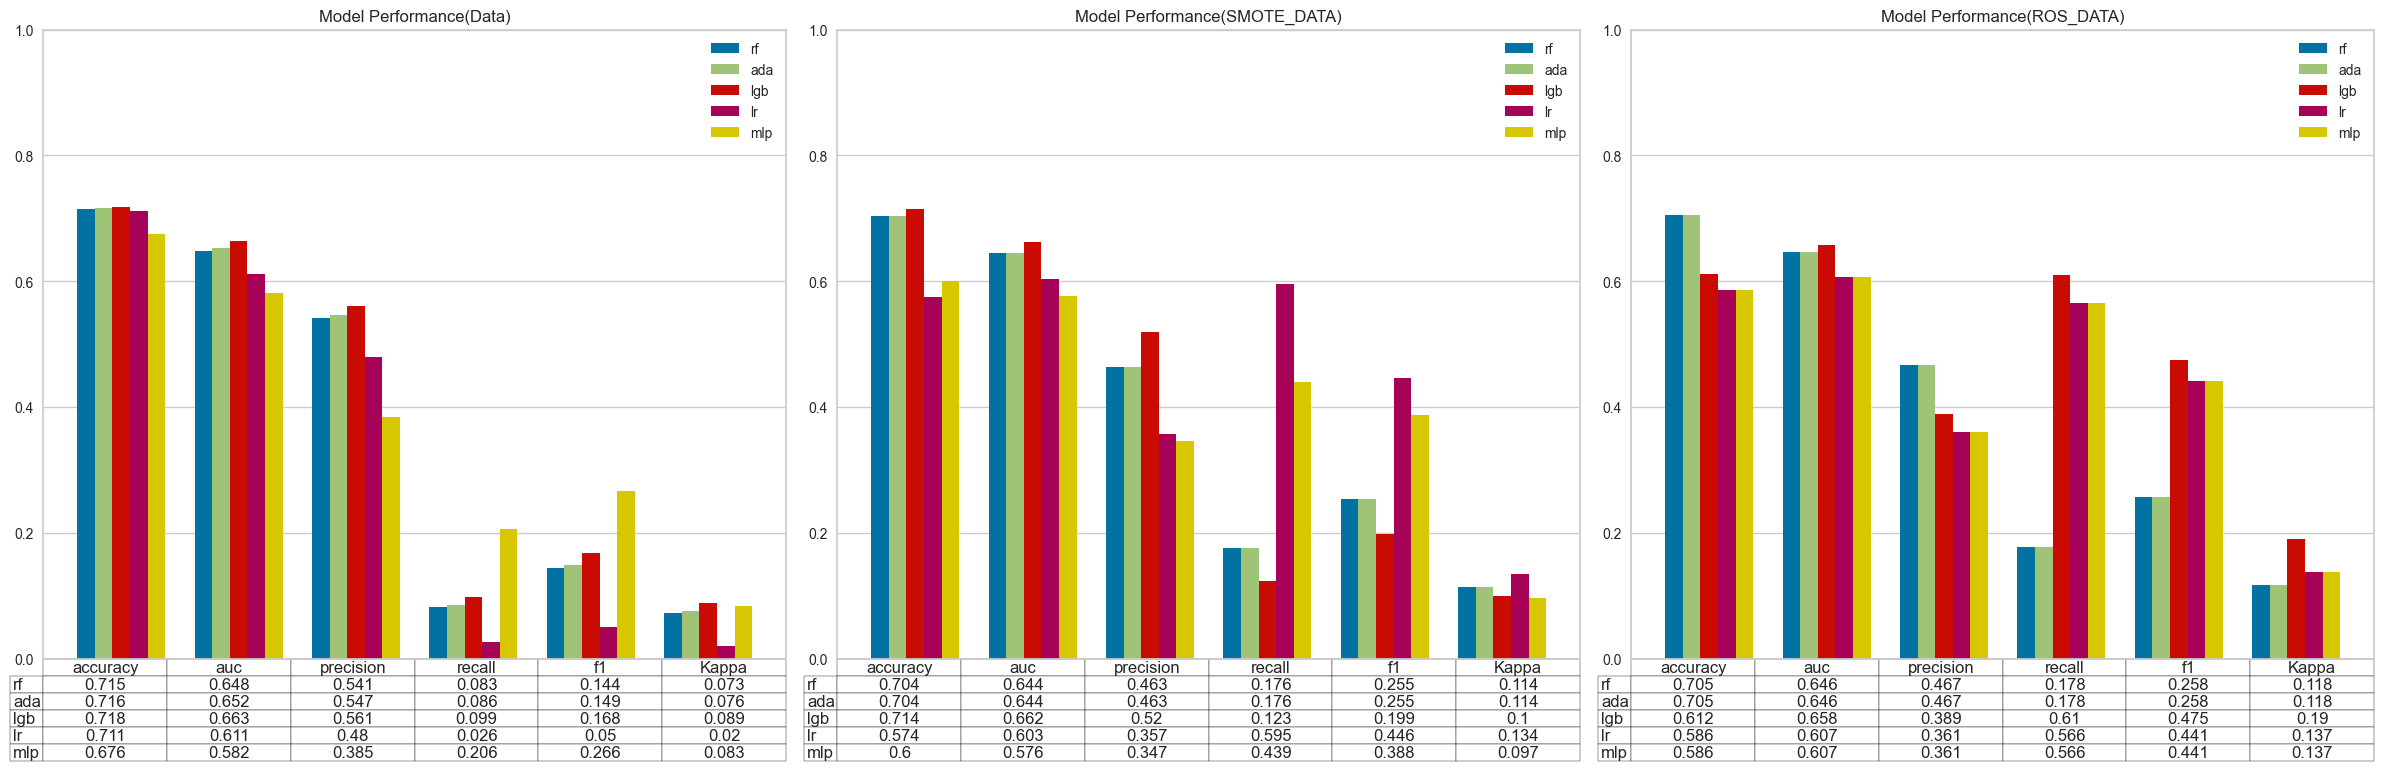

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


ev1 = me1.index  
models1 = me1.columns 


ev2 = me2.index  
models2 = me2.columns  

ev3 = me3.index
models3 = me3.columns

# X축 좌표 설정
x1 = np.arange(len(ev1))  
x2 = np.arange(len(ev2))
x3 = np.arange(len(ev3))
width = 0.15  # 막대 너비 설정

# 그래프 설정 (두 개의 subplot을 가로로 배치)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))  # 1행 3열로 서브플롯 배치

# 첫 번째 그래프 (me1에 대한 막대 그래프 그리기)
for i, model in enumerate(models1):
    ax1.bar(x1 + i * width - 2*width, me1[model], width, label=model)

ax1.set_title('Model Performance(Data)')
ax1.set_xticks([])
ax1.set_ylim([0,1])
ax1.legend()

# 그래프 하단에 표 추가
table_data1 = np.round(me1.values, 3).tolist()  # 소수점 3자리로 반올림
table_data1 = np.array(table_data1).T
table1 = ax1.table(cellText=table_data1, colLabels=ev1, rowLabels=models1, loc='bottom', cellLoc='center')

# 두 번째 그래프 (me2에 대한 막대 그래프 그리기)
for i, model in enumerate(models2):
    ax2.bar(x2 + i * width - 2*width, me2[model], width, label=model)

ax2.set_title('Model Performance(SMOTE_DATA)')
ax2.set_xticks([])
ax2.set_ylim([0,1])
ax2.legend()

# 그래프 하단에 표 추가
table_data2 = np.round(me2.values, 3).tolist()  # 소수점 3자리로 반올림
table_data2 = np.array(table_data2).T
table2 = ax2.table(cellText=table_data2, colLabels=ev2, rowLabels=models2, loc='bottom', cellLoc='center')

# 세 번째 그래프 (me3에 대한 막대 그래프 그리기)
for i, model in enumerate(models3):
    ax3.bar(x2 + i * width - 2*width, me3[model], width, label=model)

ax3.set_title('Model Performance(ROS_DATA)')
ax3.set_xticks([])
ax3.set_ylim([0,1])
ax3.legend()

# 그래프 하단에 표 추가
table_data2 = np.round(me3.values, 3).tolist()  # 소수점 3자리로 반올림
table_data2 = np.array(table_data2).T
table2 = ax3.table(cellText=table_data2, colLabels=ev3, rowLabels=models3, loc='bottom', cellLoc='center')

# 표와 그래프 사이 간격 조정
plt.subplots_adjust(left=0.1, bottom=0.0000001, wspace=0.4)  # wspace로 서브플롯 간 간격 조정
# 그래프 출력
plt.tight_layout()
plt.show()



#### 결과 요약:
- **오버샘플링(SMOTE, ROS) 적용 후**: 
  - **Accuracy**는 다소 떨어졌으나, **Recall**, **F1 Score**, **Kappa** 지표는 전반적으로 증가하는 경향을 보임.
  
- **3가지 데이터셋** (전처리 후, SMOTE 적용 후, ROS 적용 후) 데이터셋 별로 가장 성능이 좋은 모델은 각각 (LGB, LGB, (rf,ada) 임.

#### 결론:
- 오버샘플링 기법을 적용한 데이터셋은 Accuracy를 약간 떨어뜨리지만 Recall, F1 Score, Kappa와 같은 중요한 지표들을 향상시킴. 
- 모델의 최적화 및 평가 지표 선택에 따라 결과가 달라질 수 있음.
- 가장 좋은 성능을 보인 머신러닝 모델은 lightgbm 이다.